# &#x1F4D1; &nbsp; <span style="color:red"> Reflections. Deep Learning. Lesson 5</span>

##   &#x1F916; &nbsp; <span style="color:red">Links</span>

Vector Representations of Words 

- https://www.tensorflow.org/tutorials/word2vec
- https://github.com/tensorflow/models/blob/master/tutorials/embedding/word2vec.py

Introduction to Natural Language Processing 

- https://cs224d.stanford.edu/lecture_notes/notes1.pdf
- https://cs224d.stanford.edu/lectures/CS224d-Lecture1.pdf
- https://cs224d.stanford.edu/lecture_notes/notes2.pdf
- https://cs224d.stanford.edu/lectures/CS224d-Lecture2.pdf
- https://cs224d.stanford.edu/lectures/CS224d-Lecture3.pdf

CS 20SI: TensorFlow for Deep Learning Research http://web.stanford.edu/class/cs20si/lectures/notes_04.pdf

A Closer Look at Skip-gram Modelling http://homepages.inf.ed.ac.uk/ballison/pdf/lrec_skipgrams.pdf

Word2Vec Tutorial http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/

Visualizing Data Using t-SNE https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw

The Unreasonable Effectiveness of Recurrent Neural Networks http://karpathy.github.io/2015/05/21/rnn-effectiveness/

Understanding LSTM Networks http://colah.github.io/posts/2015-08-Understanding-LSTMs/

Recurrent Neural Networks https://www.tensorflow.org/tutorials/recurrent

Recurrent Neural Networks with Word Embeddings http://deeplearning.net/tutorial/rnnslu.html

RNN w/ LSTM cell example in TensorFlow and Python https://pythonprogramming.net/rnn-tensorflow-python-machine-learning-tutorial/

Backpropagation Through Time (BPTT) http://www.ra.cs.uni-tuebingen.de/SNNS/UserManual/node163.html

Bag-of-Words Methods for Text Mining http://cs.nyu.edu/courses/spring15/CSCI-GA.2590-001/BagOfWords.pdf

Bag of Words models & Part-based generative models http://vision.stanford.edu/teaching/cs231a_autumn1112/lecture/lecture15_bow_part-based_cs231a_marked.pdf

GloVe: Global Vectors for Word Representation https://nlp.stanford.edu/projects/glove/

Word2Vec, Doc2Vec, or Paragraph Vectors, etc. in Deeplearning4j 

- https://deeplearning4j.org/word2vec
- https://deeplearning4j.org/doc2vec.html#doc2vec-or-paragraph-vectors-in-deeplearning4j
- https://deeplearning4j.org/bagofwords-tf-idf
- https://deeplearning4j.org/lstm.html#recurrent

DeViSE: A Deep Visual-Semantic Embedding Model https://static.googleusercontent.com/media/research.google.com/ru//pubs/archive/41869.pdf

TensorFlow playground http://playground.tensorflow.org/

Manifold learning http://scikit-learn.org/stable/modules/manifold.html#manifold

Neural Network Toolbox https://www.mathworks.com/help/nnet/index.html

Bag of Words Meets Bags of Popcorn https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words

##   &#x1F916; &nbsp; <span style="color:red">Libraries</span>

In [87]:
from __future__ import print_function

import re
import collections
import math
import numpy as np
import pandas as pd
import os
import random
import string
import tensorflow as tf
import zipfile

from matplotlib import pylab
import matplotlib.cm as cm
from IPython.display import display, Image

from six.moves import range
from six.moves.urllib.request import urlretrieve
from sklearn.manifold import TSNE

In [78]:
import nltk
import theano
from itertools import chain, compress

In [10]:
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from sklearn.ensemble import RandomForestClassifier

In [4]:
%matplotlib inline

##   &#x1F916; &nbsp; <span style="color:red">Deep Models for Text and Sequences </span>

### Notes

**Vector space models (VSMs)** represent (embed) words in a continuous vector space where semantically similar words are mapped to nearby points ('are embedded nearby each other').

Count-based methods compute the statistics of how often some word co-occurs with its neighbor words in a large text corpus, and then map these count-statistics down to a small, dense vector for each word. Predictive models directly try to predict a word from its neighbors in terms of learned small, dense embedding vectors (considered parameters of the model).

**Word2vec** is a particularly computationally-efficient predictive model for learning word embeddings from raw text. It comes in two flavors, the **Continuous Bag-of-Words model (CBOW)** and the **Skip-Gram model**. Algorithmically, these models are similar, except that CBOW predicts target words (e.g. 'mat') from source context words ('the cat sits on the'), while the skip-gram does the inverse and predicts source context-words from the target words. This inversion might seem like an arbitrary choice, but statistically it has the effect that CBOW smoothes over a lot of the distributional information (by treating an entire context as one observation).

**The Skip-gram Model** are a technique largely used in the field of speech processing, whereby n-grams are formed (bigrams, tri-grams, etc.) but in addition to allowing adjacent sequences of words, we allow tokens to be “skipped”.

“Insurgents killed in ongoing fighting.”

- Bi-grams = {insurgents killed, killed in, in ongoing, ongoing fighting}.
- 2-skip-bi-grams = 
  - {insurgents killed, insurgents in, insurgents ongoing, killed in, killed ongoing, 
  - killed fighting, in ongoing, in fighting, ongoing fighting}
- Tri-grams = {insurgents killed in, killed in ongoing, in ongoing fighting}.
- 2-skip-tri-grams = 
  - {insurgents killed in, insurgents killed ongoing, insurgents killed fighting, 
  - insurgents in ongoing, insurgents in fighting, insurgents ongoing fighting, 
  - killed in ongoing, killed in fighting, killed ongoing fighting, in ongoing fighting}.

Skip-grams have been used many different ways in language modeling but often in conjunction with other modeling techniques or for the goal of decreasing perplexity.

Training data examples: British National Corpus, British National Corpus. Testing data examples: 300,000 words of news feeds, Eight Recent News Documents.

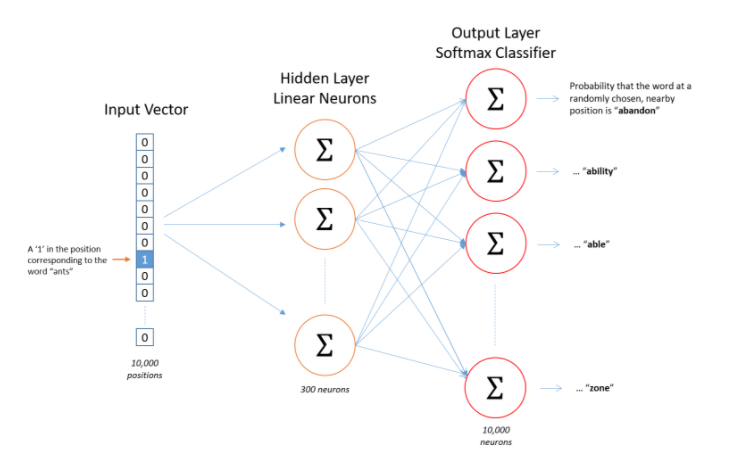

In [8]:
# The architecture of the neural network (10 000 words)
Image('ud730_07.png')

The **Bag-of-words model (BoW)** is an algorithm that counts how many times a word appears in a document. Those word counts allow us to compare documents and gauge their similarities for applications like search, document classification, and topic modeling. BoW is a method for preparing text for input in a deep-learning net.


Skip-gram vs CBOW (Continuous Bag-of-Words)

- Algorithmically, these models are similar, except that CBOW predicts center words from context words, while the skip-gram does the inverse and predicts source context-words from the center words. For example, if we have the sentence: ""The quick brown fox jumps"", then CBOW tries to predict ""brown"" from ""the"", ""quick"", ""fox"", and ""jumps"", while skip-gram tries to predict ""the"", ""quick"", ""fox"", and ""jumps"" from ""brown"".
- Statistically it has the effect that CBOW smoothes over a lot of the distributional information (by treating an entire context as one observation). For the most part, this turns out to be a useful thing for smaller datasets. However, skip-gram treats each context-target pair as a new observation, and this tends to do better when we have larger datasets.

The **Term-frequency-inverse document frequency (TF-IDF)** is another way to judge the topic of an article by the words it contains. With TF-IDF, words are given weight – TF-IDF measures relevance, not frequency. That is, word counts are replaced with TF-IDF scores across the whole dataset.

First, TF-IDF measures the number of times that words appear in a given document (that’s term frequency). But because words such as “and” or “the” appear frequently in all documents, those are systematically discounted. That’s the inverse-document frequency part. The more documents a word appears in, the less valuable that word is as a signal. That’s intended to leave only the frequent AND distinctive words as markers. Each word’s TF-IDF relevance is a normalized data format that also adds up to one.

The **t-distributed Stochastic Neighbour Embedding (t-SNE)** is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high.

t-SNE Advantages:
-  particularly sensitive to local structure- revealing the structure at many scales on a single map;
- revealing data that lie in multiple, different, manifolds or clusters;
- reducing the tendency to crowd points together at the centre.

t-SNE Disadvantages:
- computationally expensive and can take several hours on million-sample datasets where PCA will finish in seconds or minutes;
- the Barnes-Hut t-SNE method is limited to two or three dimensional embeddings
- the algorithm is stochastic and multiple restarts with different seeds can yield different embeddings; however, it is perfectly legitimate to pick the embedding with the least error;
- global structure is not explicitly preserved. 

There are five parameters that control the optimization of t-SNE and therefore possibly the quality of the resulting embedding:
- perplexity
- early exaggeration factor
- learning rate
- maximum number of iterations
- angle (not used in the exact method)

**How to structure your TensorFlow model**

Phase 1: assemble the graph
    
1. Define placeholders for input and output
2. Define the weights
3. Define the inference model
4. Define loss function
5. Define optimizer

Phase 2: execute the computation

1. Initialize all model variables for the first time.
2. Feed in the training data. Might involve randomizing the order of data samples.
3. Execute the inference model on the training data, so it calculates for each training input example the output with the current model parameters.
4. Compute the cost
5. Adjust the model parameters to minimize/maximize the cost depending on the model

**Example of Training A Text Embedding Model**

1) The **deep visual-semantic embedding model (DeViSE)** leverages textual data to learn semantic relationships between labels, and explicitly maps images into a rich semantic embedding space.

   - Language Model Pre-training (Skip-gram LM)
   - Visual Model Pre-training (Traditional VM)
   - Deep Visual Semantic Embedding Model

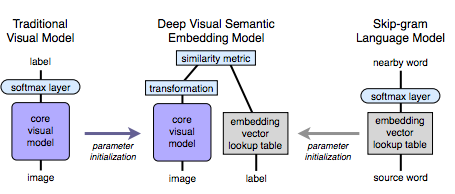

In [5]:
Image('ud730_06.png')

2) **Doc2vec** is an extension of word2vec that learns to correlate labels and words, rather than words with other words. Deeplearning4j’s implementation is intended to serve the Java, Scala and Clojure communities.

- The main step is coming up with a vector that represents the “meaning” of a document, which can then be used as input to a supervised machine learning algorithm to associate documents with labels.

**Recurrent Neural Networks (RNNs)** is a class of artificial neural networks where connections between units form a directed cycle. For example, Recursive NNs are created by applying the same set of weights recursively over a structure, to produce a structured prediction over variable-size input structures, or a scalar prediction on it, by traversing a given structure in topological order. RNNs have been successful for instance in learning sequence and tree structures in natural language processing, mainly phrase and sentence continuous representations based on word embedding.

The core of the model consists of an **LSTM cell** that processes one word at a time and computes probabilities of the possible values for the next word in the sentence. The memory state of the network is initialized with a vector of zeros and gets updated after reading each word.

**Backpropagation Through Time (BPTT)** is a learning algorithm for recurrent networks that are updated in discrete time steps (non-fixpoint networks). These networks may contain any number of feedback loops in their connectivity graph.

BPTT: Backpropagation through time with online-update.

The gradient for each weight is summed over backstep copies between successive layers and the weights are adapted using the formula for backpropagation with momentum term after each pattern. The momentum term uses the weight change during the previous pattern. Using small learning rates eta, BPTT is especially useful to start adaption with a large number of patterns since the weights are updated much more frequently than in batch-update.

BBPTT: Batch backpropagation through time.

The gradient for each weight is calculated for each pattern as in BPTT and then averaged over the whole training set. The momentum term uses update information closer to the true gradient than in BPTT.

QPTT: Quickprop through time.

The gradient in quickprop through time is calculated as in BBPTT, but the weights are adapted using the substantially more efficient quickprop-update rule.

### Examples

#### NLTK

In [22]:
panda_set = wn.synset("good.n.01")
hyper = lambda s: s.hypernyms()
print(list(panda_set.closure(hyper)))

[Synset('advantage.n.01'), Synset('asset.n.01'), Synset('quality.n.01'), Synset('attribute.n.02'), Synset('abstraction.n.06'), Synset('entity.n.01')]


In [23]:
print(set(chain.from_iterable([word.lemma_names() for word in wn.synsets('small')])))

{'modest', 'diminished', 'little', 'pocket-sized', 'minuscule', 'humble', 'pocket-size', 'small', 'minor', 'lowly', 'belittled', 'low', 'small-scale'}


#### Bag of Words

In [5]:
train = pd.read_csv('labeledTrainData.tsv', header=0, delimiter="\t", quoting=3)
test = pd.read_csv('testData.tsv', header=0, delimiter="\t", quoting=3)

In [6]:
train.shape

(25000, 3)

In [7]:
train["review"][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [11]:
print (stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [12]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review, "lxml").get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))

In [13]:
clean_review = review_to_words( train["review"][0] )
print (clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [15]:
# Get the number of reviews based on the dataframe column size
num_reviews = train["review"].size

# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range( 0, num_reviews ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_train_reviews.append( review_to_words( train["review"][i] ) )

In [18]:
print ("Cleaning and parsing the training set movie reviews...\n")
clean_train_reviews = []
for i in range( 0, num_reviews ):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%5000 == 0 ):
        print ("Review %d of %d\n" % ( i+1, num_reviews ) )                                                                   
    clean_train_reviews.append( review_to_words( train["review"][i] ))

Cleaning and parsing the training set movie reviews...

Review 5000 of 25000

Review 10000 of 25000

Review 15000 of 25000

Review 20000 of 25000

Review 25000 of 25000



In [19]:
print ("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()


Creating the bag of words...



In [20]:
train_data_features.shape

(25000, 5000)

In [25]:
vocab = vectorizer.get_feature_names()
print(vocab[:10])

['abandoned', 'abc', 'abilities', 'ability', 'able', 'abraham', 'absence', 'absent', 'absolute', 'absolutely']


In [32]:
# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
i=1
for tag, count in zip(vocab, dist):
        print (count, tag)
        i+=1
        if i > 10: break

187 abandoned
125 abc
108 abilities
454 ability
1259 able
85 abraham
116 absence
83 absent
352 absolute
1485 absolutely


In [33]:
print ("Training the random forest...")

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, train["sentiment"] )

Training the random forest...


In [37]:
# Read the test data
test = pd.read_csv("testData.tsv", header=0, delimiter="\t", \
                   quoting=3 )

# Verify that there are 25,000 rows and 2 columns
print (test.shape)

# Create an empty list and append the clean reviews one by one
num_reviews = len(test["review"])
clean_test_reviews = [] 

print ("Cleaning and parsing the test set movie reviews...\n")
for i in range(0,num_reviews):
    if( (i+1) % 5000 == 0 ):
        print ("Review %d of %d\n" % (i+1, num_reviews))
    clean_review = review_to_words( test["review"][i] )
    clean_test_reviews.append( clean_review )

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
result = forest.predict(test_data_features)

# Copy the results to a pandas dataframe with an "id" column and
# a "sentiment" column
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )

(25000, 2)
Cleaning and parsing the test set movie reviews...

Review 5000 of 25000

Review 10000 of 25000

Review 15000 of 25000

Review 20000 of 25000

Review 25000 of 25000



In [52]:
train[train["sentiment"]==1]["review"][19]

'"Most people, especially young people, may not understand this film. It looks like a story of loss, when it is actually a story about being alone. Some people may never feel loneliness at this level.<br /><br />Cheadles character Johnson reflected the total opposite of Sandlers character Fineman. Where Johnson felt trapped by his blessings, Fineman was trying to forget his life in the same perspective. Jada is a wonderful additive to the cast and Sandler pulls tears. Cheadle had the comic role and was a great supporter for Sandler.<br /><br />I see Oscars somewhere here. A very fine film. If you have ever lost and felt alone, this film will assure you that you\'re not alone.<br /><br />Jerry"'

#### Simple	SVD	word	vectors

In [54]:
# Corpus: I like deep learning. I like NLP. I enjoy flying.
la = np.linalg
units = ["I", "like", "enjoy", "deep", "learning", "NLP", "flying", "."]
X = np.array([[0,2,1,0,0,0,0,0], 
              [2,0,0,1,0,1,0,0], 
              [1,0,0,0,0,0,1,0], 
              [0,1,0,0,1,0,0,0],
              [0,0,0,1,0,0,0,1], 
              [0,1,0,0,0,0,0,1], 
              [0,0,1,0,0,0,0,1], 
              [0,0,0,0,1,1,1,0]])
u,s,Vh = la.svd(X, full_matrices=False)

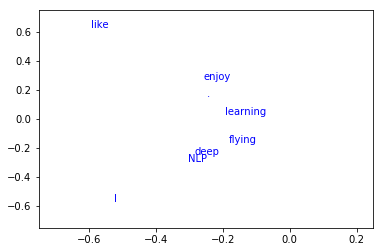

In [69]:
pylab.xlim([-0.75, 0.25])
pylab.ylim([-0.75, 0.75])
for i in range(len(units)):
    pylab.text(u[i,0], u[i,1], units[i], color="blue")

#### LSTM cell

In [77]:
def recurrent_neural_network(x):
    layer = {'weights':tf.Variable(tf.random_normal([rnn_size,n_classes])),
             'biases':tf.Variable(tf.random_normal([n_classes]))}

    x = tf.transpose(x, [1,0,2])
    x = tf.reshape(x, [-1, chunk_size])
    x = tf.split(0, n_chunks, x)

    lstm_cell = rnn_cell.BasicLSTMCell(rnn_size,state_is_tuple=True)
    outputs, states = rnn.rnn(lstm_cell, x, dtype=tf.float32)

    output = tf.matmul(outputs[-1],layer['weights']) + layer['biases']

    return output

#### Elman RNN

In [79]:
# http://deeplearning.net/tutorial/rnnslu.html
class RNNSLU(object):
    ''' elman neural net model '''
    def __init__(self, nh, nc, ne, de, cs):
        '''
        nh :: dimension of the hidden layer
        nc :: number of classes
        ne :: number of word embeddings in the vocabulary
        de :: dimension of the word embeddings
        cs :: word window context size
        '''
        # parameters of the model
        self.emb = theano.shared(name='embeddings',
                                 value=0.2 * numpy.random.uniform(-1.0, 1.0,
                                 (ne+1, de))
                                 # add one for padding at the end
                                 .astype(theano.config.floatX))
        self.wx = theano.shared(name='wx',
                                value=0.2 * numpy.random.uniform(-1.0, 1.0,
                                (de * cs, nh))
                                .astype(theano.config.floatX))
        self.wh = theano.shared(name='wh',
                                value=0.2 * numpy.random.uniform(-1.0, 1.0,
                                (nh, nh))
                                .astype(theano.config.floatX))
        self.w = theano.shared(name='w',
                               value=0.2 * numpy.random.uniform(-1.0, 1.0,
                               (nh, nc))
                               .astype(theano.config.floatX))
        self.bh = theano.shared(name='bh',
                                value=numpy.zeros(nh,
                                dtype=theano.config.floatX))
        self.b = theano.shared(name='b',
                               value=numpy.zeros(nc,
                               dtype=theano.config.floatX))
        self.h0 = theano.shared(name='h0',
                                value=numpy.zeros(nh,
                                dtype=theano.config.floatX))

        # bundle
        self.params = [self.emb, self.wx, self.wh, self.w,
                       self.bh, self.b, self.h0]
        idxs = T.imatrix()
        x = self.emb[idxs].reshape((idxs.shape[0], de*cs))
        y_sentence = T.ivector('y_sentence')  # labels
        
        def recurrence(x_t, h_tm1):
            h_t = T.nnet.sigmoid(T.dot(x_t, self.wx)
                                 + T.dot(h_tm1, self.wh) + self.bh)
            s_t = T.nnet.softmax(T.dot(h_t, self.w) + self.b)
            return [h_t, s_t]

        [h, s], _ = theano.scan(fn=recurrence,
                                sequences=x,
                                outputs_info=[self.h0, None],
                                n_steps=x.shape[0])

        p_y_given_x_sentence = s[:, 0, :]
        y_pred = T.argmax(p_y_given_x_sentence, axis=1)        

        lr = T.scalar('lr')

        sentence_nll = -T.mean(T.log(p_y_given_x_sentence)
                               [T.arange(x.shape[0]), y_sentence])
        sentence_gradients = T.grad(sentence_nll, self.params)
        sentence_updates = OrderedDict((p, p - lr*g)
                                       for p, g in
                                       zip(self.params, sentence_gradients))

        self.classify = theano.function(inputs=[idxs], outputs=y_pred)
        self.sentence_train = theano.function(inputs=[idxs, y_sentence, lr],
                                              outputs=sentence_nll,
                                              updates=sentence_updates)
        
        self.normalize = theano.function(inputs=[],
                                         updates={self.emb:
                                                  self.emb /
                                                  T.sqrt((self.emb**2)
                                                  .sum(axis=1))
                                                  .dimshuffle(0, 'x')})        

### Quizes

In [1]:
# Quiz: Word Analogy Game
# puppy - dog + cat = kitten
# taller - tall + short = shorter

##   &#x1F916; &nbsp; <span style="color:red">Assignment 5: Word2Vec and CBOW</span>

In [83]:
url = 'http://mattmahoney.net/dc/'

def maybe_download(filename, expected_bytes):
    """Download a file if not present, and make sure it's the right size."""
    if not os.path.exists(filename):
        filename, _ = urlretrieve(url + filename, filename)
    statinfo = os.stat(filename)
    if statinfo.st_size == expected_bytes:
        print('Found and verified %s' % filename)
    else:
        print(statinfo.st_size)
        raise Exception('Failed to verify ' + filename + '. Can you get to it with a browser?')
    return filename

filename = maybe_download('text8.zip', 31344016)

Found and verified text8.zip


In [32]:
def read_data(filename):
    """Extract the first file enclosed in a zip file as a list of words"""
    with zipfile.ZipFile(filename) as f:
        data = tf.compat.as_str(f.read(f.namelist()[0])).split()
    return data
  
words = read_data(filename)
print('Data size %d' % len(words))

Data size 17005207


In [33]:
vocabulary_size = 50000

def build_dataset(words):
    count = [['UNK', -1]]
    count.extend(collections.Counter(words).most_common(vocabulary_size - 1))
    dictionary = dict()
    for word, _ in count:
        dictionary[word] = len(dictionary)
    data = list()
    unk_count = 0
    for word in words:
        if word in dictionary:
            index = dictionary[word]
        else:
            index = 0  # dictionary['UNK']
            unk_count = unk_count + 1
        data.append(index)
    count[0][1] = unk_count
    reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys())) 
    return data, count, dictionary, reverse_dictionary

data, count, dictionary, reverse_dictionary = build_dataset(words)
print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10])
del words  # Hint to reduce memory.

Most common words (+UNK) [['UNK', 418391], ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764)]
Sample data [5238, 3082, 12, 6, 195, 2, 3136, 46, 59, 156]


In [27]:
data_index = 0

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1 # [ skip_window target skip_window ]
    buffer = collections.deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips):
        target = skip_window  # target label at the center of the buffer
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = random.randint(0, span - 1)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels

print('data:', [reverse_dictionary[di] for di in data[:8]])

for num_skips, skip_window in [(2, 1), (4, 2)]:
    data_index = 0
    batch, labels = generate_batch(batch_size=8, num_skips=num_skips, skip_window=skip_window)
    print('\nwith num_skips = %d and skip_window = %d:' % (num_skips, skip_window))
    print('    batch:', [reverse_dictionary[bi] for bi in batch])
    print('    labels:', [reverse_dictionary[li] for li in labels.reshape(8)])

data: ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first']

with num_skips = 2 and skip_window = 1:
    batch: ['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term']
    labels: ['as', 'anarchism', 'a', 'originated', 'as', 'term', 'a', 'of']

with num_skips = 4 and skip_window = 2:
    batch: ['as', 'as', 'as', 'as', 'a', 'a', 'a', 'a']
    labels: ['term', 'anarchism', 'originated', 'a', 'as', 'term', 'of', 'originated']


In [28]:
batch_size = 128
embedding_size = 128 # Dimension of the embedding vector.
skip_window = 1 # How many words to consider left and right.
num_skips = 2 # How many times to reuse an input to generate a label.
# We pick a random validation set to sample nearest neighbors. here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent. 
valid_size = 16 # Random set of words to evaluate similarity on.
valid_window = 100 # Only pick dev samples in the head of the distribution.
valid_examples = np.array(random.sample(range(valid_window), valid_size))
num_sampled = 64 # Number of negative examples to sample.

graph = tf.Graph()

with graph.as_default(), tf.device('/cpu:0'):

    # Input data.
    train_dataset = tf.placeholder(tf.int32, shape=[batch_size])
    train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)
  
    # Variables.
    embeddings = tf.Variable(tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
    softmax_weights = tf.Variable(tf.truncated_normal([vocabulary_size, embedding_size],
                                                       stddev=1.0 / math.sqrt(embedding_size)))
    softmax_biases = tf.Variable(tf.zeros([vocabulary_size]))
  
    # Model.
    # Look up embeddings for inputs.
    embed = tf.nn.embedding_lookup(embeddings, train_dataset)
    # Compute the softmax loss, using a sample of the negative labels each time.
    loss = tf.reduce_mean(tf.nn.sampled_softmax_loss(weights=softmax_weights, biases=softmax_biases, 
                                                     inputs=embed, labels=train_labels, 
                                                     num_sampled=num_sampled, num_classes=vocabulary_size))

    # Optimizer.
    # Note: The optimizer will optimize the softmax_weights AND the embeddings.
    # This is because the embeddings are defined as a variable quantity and the
    # optimizer's `minimize` method will by default modify all variable quantities 
    # that contribute to the tensor it is passed.
    # See docs on `tf.train.Optimizer.minimize()` for more details.
    optimizer = tf.train.AdagradOptimizer(1.0).minimize(loss)
  
    # Compute the similarity between minibatch examples and all embeddings.
    # We use the cosine distance:
    norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
    normalized_embeddings = embeddings / norm
    valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
    similarity = tf.matmul(valid_embeddings, tf.transpose(normalized_embeddings))

In [29]:
num_steps = 100001

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print('Initialized')
    average_loss = 0
    for step in range(num_steps):
        batch_data, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_dataset : batch_data, train_labels : batch_labels}
        _, l = session.run([optimizer, loss], feed_dict=feed_dict)
        average_loss += l
        if step % 2000 == 0:
            if step > 0:
                average_loss = average_loss / 2000
            # The average loss is an estimate of the loss over the last 2000 batches.
            print('Average loss at step %d: %f' % (step, average_loss))
            average_loss = 0
        # note that this is expensive (~20% slowdown if computed every 500 steps)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = reverse_dictionary[valid_examples[i]]
                top_k = 8 # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log = 'Nearest to %s:' % valid_word
                for k in range(top_k):
                    close_word = reverse_dictionary[nearest[k]]
                    log = '%s %s,' % (log, close_word)
                print(log)
    final_embeddings = normalized_embeddings.eval()

Initialized
Average loss at step 0: 7.629456
Nearest to on: fruitarians, artcyclopedia, semantically, gg, circling, ions, filking, insurgencies,
Nearest to most: laika, textile, ambiguities, chelsea, gdb, expressiveness, vee, bladed,
Nearest to a: trotskyist, earning, pogues, francium, hammond, termini, transfered, eusebius,
Nearest to history: tradition, montezuma, haag, ljubljana, nicomedia, slide, nonetheless, fortnight,
Nearest to six: mandrakesoft, fail, alene, saito, behavioural, rms, arpa, lighten,
Nearest to first: fetus, menlo, gotthold, campy, malnutrition, bland, enabling, flagg,
Nearest to have: counselling, oxidising, tisdall, doctrines, apprentice, eng, dahmer, newt,
Nearest to but: peculiarity, min, clarence, earners, immunization, protected, supercar, fluke,
Nearest to than: subgenus, averted, attribution, crevasses, belarusian, lenovo, commuting, consultancy,
Nearest to and: garth, silenced, mediums, cogency, cyrenaica, hass, probabilistic, atchison,
Nearest to years: 

Average loss at step 52000: 3.439283
Average loss at step 54000: 3.426740
Average loss at step 56000: 3.435872
Average loss at step 58000: 3.395946
Average loss at step 60000: 3.388467
Nearest to on: upon, through, fruitarians, in, within, barkley, freshmen, about,
Nearest to most: more, many, some, especially, less, londinium, huron, krafft,
Nearest to a: the, another, any, verified, woodson, alphabetically, youssef, every,
Nearest to history: microphones, bengali, tradition, arterial, list, politics, macbeth, nightclubs,
Nearest to six: eight, four, five, nine, seven, three, zero, two,
Nearest to first: second, last, next, same, dualist, ferment, original, eleventh,
Nearest to have: has, had, are, were, thc, be, require, produce,
Nearest to but: however, although, and, see, though, than, or, which,
Nearest to than: or, but, and, much, stormbringer, wrestling, korfball, algonquian,
Nearest to and: or, but, including, although, than, nationalistic, especially, in,
Nearest to years: day

In [30]:
num_points = 500

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=7000, method='exact')
two_d_embeddings = tsne.fit_transform(final_embeddings[1:num_points+1, :])

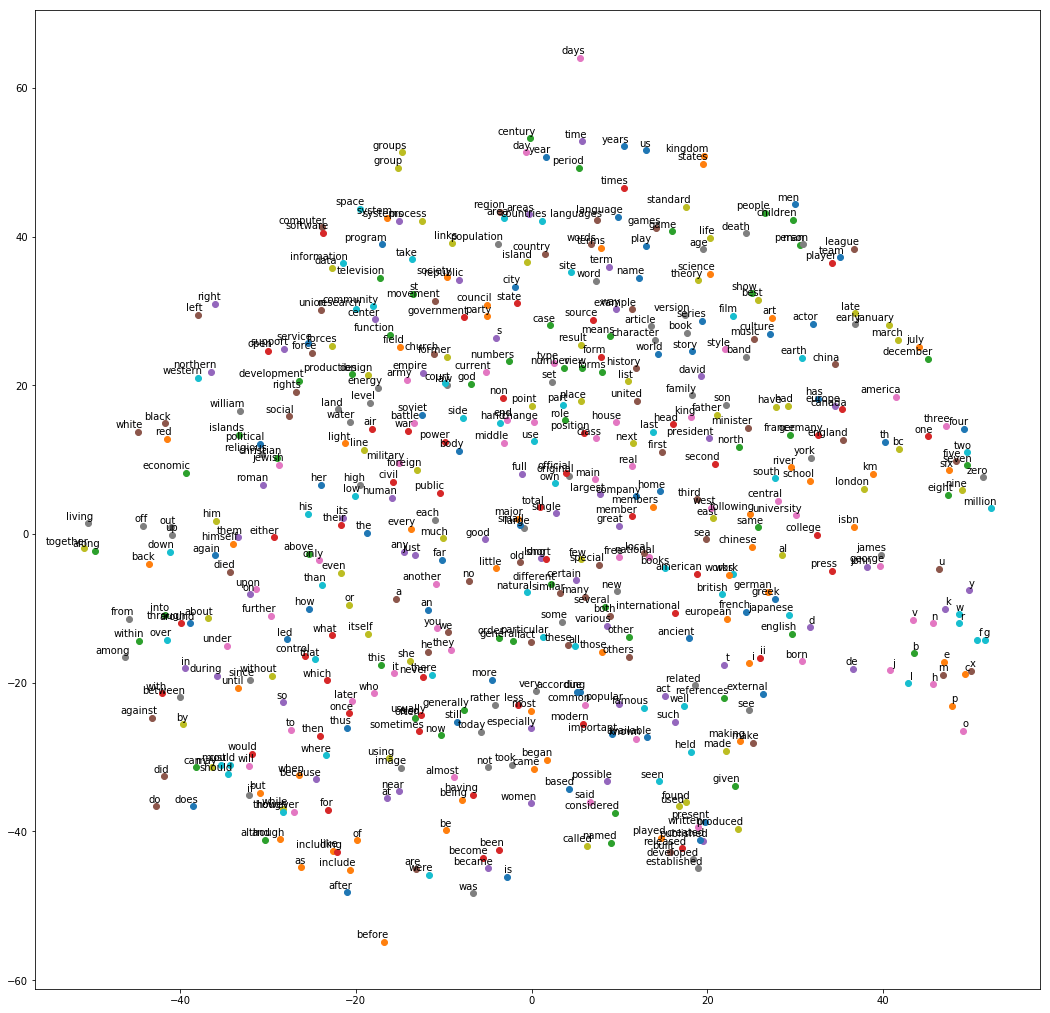

In [31]:
def plot(embeddings, labels):
    assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
    pylab.figure(figsize=(18,18))  
    for i, label in enumerate(labels):
        x, y = embeddings[i,:]
        pylab.scatter(x, y)
        pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

words = [reverse_dictionary[i] for i in range(1, num_points+1)]
plot(two_d_embeddings, words)

Problem


An alternative to skip-gram is another Word2Vec model called CBOW (Continuous Bag of Words). In the CBOW model, instead of predicting a context word from a word vector, you predict a word from the sum of all the word vectors in its context. Implement and evaluate a CBOW model trained on the text8 dataset.

In [34]:
# https://github.com/zergood/udacity-deep-learning-assignment-5/blob/master/5_word2vec_cbow.ipynb
def generate_batch_cbow(data, batch_size, neighbourhood_radius):
    global data_index
    assert batch_size % neighbourhood_radius == 0
    sliding_window_len = 2 * neighbourhood_radius + 1
    
    batch = np.ndarray(shape=(batch_size, 2 * neighbourhood_radius), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    
    buffer = collections.deque(maxlen=sliding_window_len) 
    for _ in range(sliding_window_len):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    
    for i in range(batch_size):
        mask = [1] * sliding_window_len
        mask[neighbourhood_radius] = 0 
        batch[i, :] = list(compress(buffer, mask))
        labels[i, 0] = buffer[neighbourhood_radius]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels

In [36]:
batch_size = 128
embedding_size = 128
neighbourhood_radius = 1 
neighbours_count = 2*neighbourhood_radius

valid_size = 16 
valid_window = 100
valid_examples = np.array(random.sample(range(valid_window), valid_size))
num_sampled = 64


In [37]:
graph = tf.Graph()

with graph.as_default(), tf.device('/cpu:0'):

    # Input data.
    train_dataset = tf.placeholder(tf.int32, shape=[batch_size, neighbours_count])
    train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)
  
    # Variables.
    embeddings = tf.Variable(tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
    
      
        
    softmax_weights = tf.Variable(
        tf.truncated_normal([vocabulary_size, embedding_size], stddev=1.0 / math.sqrt(embedding_size)))
    softmax_biases = tf.Variable(tf.zeros([vocabulary_size]))
  
    # Model.
    # Look up embeddings for inputs.
    embed = tf.zeros([batch_size, embedding_size])
    
    for i in range(neighbours_count):
        embed += tf.nn.embedding_lookup(embeddings, train_dataset[:, i])
        
    # Compute the softmax loss, using a sample of the negative labels each time.
    loss = tf.reduce_mean(
        tf.nn.sampled_softmax_loss(softmax_weights, softmax_biases, embed,
                               train_labels, num_sampled, vocabulary_size))


    optimizer = tf.train.AdagradOptimizer(1.0).minimize(loss)
  
    # Compute the similarity between minibatch examples and all embeddings.
    # We use the cosine distance:
    norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
    normalized_embeddings = embeddings / norm
    valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
    similarity = tf.matmul(valid_embeddings, tf.transpose(normalized_embeddings))

In [44]:
num_steps = 100001

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print('Initialized')
    average_loss = 0
    for step in range(num_steps):
        batch_data, batch_labels = generate_batch_cbow(data, batch_size, neighbourhood_radius)
        feed_dict = {train_dataset : batch_data, train_labels : batch_labels}
        _, l = session.run([optimizer, loss], feed_dict=feed_dict)
        average_loss += l
    
        if step % 2000 == 0:
            if step > 0:
                average_loss = average_loss / 2000
            print('Average loss at step %d: %f' % (step, average_loss))
            average_loss = 0
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = reverse_dictionary[valid_examples[i]]
                top_k = 8 # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log = 'Nearest to %s:' % valid_word
                for k in range(top_k):
                    close_word = reverse_dictionary[nearest[k]]
                    log = '%s %s,' % (log, close_word)
                print(log)
    final_embeddings = normalized_embeddings.eval()

Initialized
Average loss at step 0: 8.138458
Nearest to known: scheduling, gloucestershire, nitrites, errand, drum, iga, lattices, visconti,
Nearest to been: battlefield, yardage, eben, glamorgan, barley, southward, courteous, unsafe,
Nearest to some: schott, unresolved, cabbie, uneven, diasporas, vhs, mwi, experiment,
Nearest to for: bledsoe, benelux, stint, recitation, acrobatics, bail, coed, maximize,
Nearest to have: disassembled, regulations, bushes, conjunctions, sutra, jabberwocky, suprarenal, courtenay,
Nearest to but: univ, swirling, pritchard, insensible, azar, australes, vardar, mobster,
Nearest to see: horribilis, fricatives, horrified, thirst, unremarkable, picts, soa, paradoxes,
Nearest to used: enabling, skew, edie, warriors, imagined, panacea, cartoonists, load,
Nearest to he: denotation, laramie, enforcement, ditches, reactivity, motley, atrium, minute,
Nearest to over: populous, confederacy, arrangement, fee, inmates, bronzes, habsburgs, kip,
Nearest to who: threatens

Average loss at step 52000: 2.891717
Average loss at step 54000: 2.860677
Average loss at step 56000: 2.861093
Average loss at step 58000: 2.745973
Average loss at step 60000: 2.832576
Nearest to known: used, defined, understood, seen, such, considered, depicted, called,
Nearest to been: become, be, were, was, researchers, tether, come, caesarea,
Nearest to some: many, several, any, certain, these, most, various, this,
Nearest to for: carnatic, xing, austral, menabrea, flops, without, agnostics, despite,
Nearest to have: had, has, be, include, were, refer, provide, having,
Nearest to but: however, although, and, though, see, while, isfahan, etzel,
Nearest to see: include, but, references, includes, pipelining, apply, apl, beacons,
Nearest to used: seen, available, known, referred, written, described, designed, held,
Nearest to he: she, it, they, there, who, eventually, we, soon,
Nearest to over: quinine, through, between, about, around, into, across, doth,
Nearest to who: which, he, st

In [45]:
num_points = 500

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=7000, method='exact')
two_d_embeddings = tsne.fit_transform(final_embeddings[1:num_points+1, :])

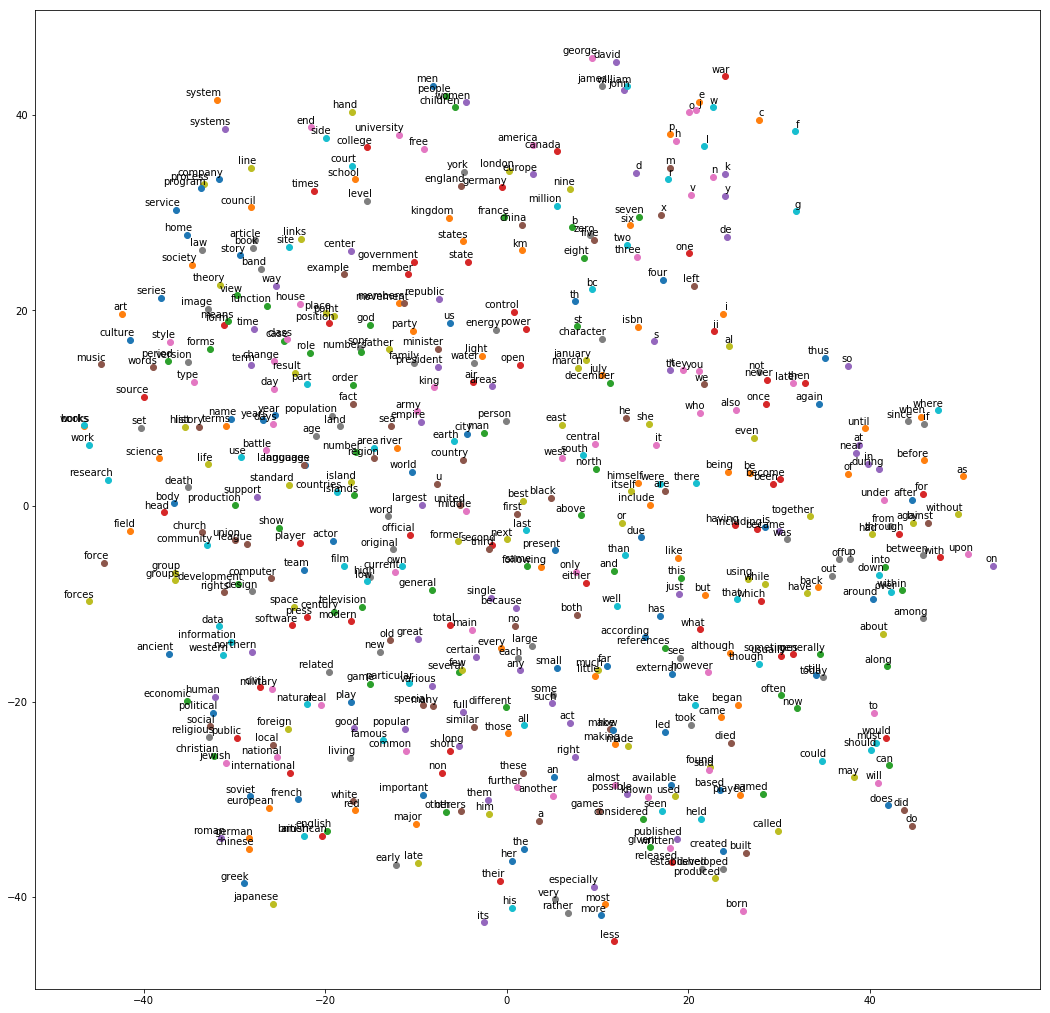

In [48]:
def plot(embeddings, labels):
    assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
    pylab.figure(figsize=(18,18))
    for i, label in enumerate(labels):
        x, y = embeddings[i,:]
        pylab.scatter(x, y)
        pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                       ha='right', va='bottom')

words = [reverse_dictionary[i] for i in range(1, num_points+1)]
plot(two_d_embeddings, words);

##   &#x1F916; &nbsp; <span style="color:red">Assignment 6</span>

In [94]:
def read_data(filename):
    with zipfile.ZipFile(filename) as f:
        name = f.namelist()[0]
        data = tf.compat.as_str(f.read(name))
    return data
  
text = read_data(filename)
print('Data size %d' % len(text))

Data size 100000000


In [95]:
valid_size = 1000
valid_text = text[:valid_size]
train_text = text[valid_size:]
train_size = len(train_text)
print(train_size, train_text[:64])
print(valid_size, valid_text[:64])

99999000 ons anarchists advocate social relations based upon voluntary as
1000  anarchism originated as a term of abuse first used against earl


In [96]:
vocabulary_size = len(string.ascii_lowercase) + 1 # [a-z] + ' '
first_letter = ord(string.ascii_lowercase[0])

def char2id(char):
    if char in string.ascii_lowercase:
        return ord(char) - first_letter + 1
    elif char == ' ':
        return 0
    else:
        print('Unexpected character: %s' % char)
        return 0
  
def id2char(dictid):
    if dictid > 0:
        return chr(dictid + first_letter - 1)
    else:
        return ' '

print(char2id('a'), char2id('z'), char2id(' '), char2id('ï'))
print(id2char(1), id2char(26), id2char(0))

Unexpected character: ï
1 26 0 0
a z  


In [97]:
batch_size=64
num_unrollings=10

class BatchGenerator(object):
    def __init__(self, text, batch_size, num_unrollings):
        self._text = text
        self._text_size = len(text)
        self._batch_size = batch_size
        self._num_unrollings = num_unrollings
        segment = self._text_size // batch_size
        self._cursor = [ offset * segment for offset in range(batch_size)]
        self._last_batch = self._next_batch()
  
    def _next_batch(self):
        """Generate a single batch from the current cursor position in the data."""
        batch = np.zeros(shape=(self._batch_size, vocabulary_size), dtype=np.float)
        for b in range(self._batch_size):
            batch[b, char2id(self._text[self._cursor[b]])] = 1.0
            self._cursor[b] = (self._cursor[b] + 1) % self._text_size
        return batch
  
    def next(self):
        """Generate the next array of batches from the data. The array consists of
        the last batch of the previous array, followed by num_unrollings new ones."""
        batches = [self._last_batch]
        for step in range(self._num_unrollings):
            batches.append(self._next_batch())
        self._last_batch = batches[-1]
        return batches

def characters(probabilities):
    """Turn a 1-hot encoding or a probability distribution over the possible
    characters back into its (most likely) character representation."""
    return [id2char(c) for c in np.argmax(probabilities, 1)]

def batches2string(batches):
    """Convert a sequence of batches back into their (most likely) string
    representation."""
    s = [''] * batches[0].shape[0]
    for b in batches:
        s = [''.join(x) for x in zip(s, characters(b))]
    return s

train_batches = BatchGenerator(train_text, batch_size, num_unrollings)
valid_batches = BatchGenerator(valid_text, 1, 1)

print(batches2string(train_batches.next()))
print(batches2string(train_batches.next()))
print(batches2string(valid_batches.next()))
print(batches2string(valid_batches.next()))

['ons anarchi', 'when milita', 'lleria arch', ' abbeys and', 'married urr', 'hel and ric', 'y and litur', 'ay opened f', 'tion from t', 'migration t', 'new york ot', 'he boeing s', 'e listed wi', 'eber has pr', 'o be made t', 'yer who rec', 'ore signifi', 'a fierce cr', ' two six ei', 'aristotle s', 'ity can be ', ' and intrac', 'tion of the', 'dy to pass ', 'f certain d', 'at it will ', 'e convince ', 'ent told hi', 'ampaign and', 'rver side s', 'ious texts ', 'o capitaliz', 'a duplicate', 'gh ann es d', 'ine january', 'ross zero t', 'cal theorie', 'ast instanc', ' dimensiona', 'most holy m', 't s support', 'u is still ', 'e oscillati', 'o eight sub', 'of italy la', 's the tower', 'klahoma pre', 'erprise lin', 'ws becomes ', 'et in a naz', 'the fabian ', 'etchy to re', ' sharman ne', 'ised empero', 'ting in pol', 'd neo latin', 'th risky ri', 'encyclopedi', 'fense the a', 'duating fro', 'treet grid ', 'ations more', 'appeal of d', 'si have mad']
['ists advoca', 'ary governm', 'hes nat

In [100]:
def logprob(predictions, labels):
    """Log-probability of the true labels in a predicted batch."""
    predictions[predictions < 1e-10] = 1e-10
    return np.sum(np.multiply(labels, -np.log(predictions))) / labels.shape[0]

def sample_distribution(distribution):
    """Sample one element from a distribution assumed to be an array of normalized
    probabilities."""
    r = random.uniform(0, 1)
    s = 0
    for i in range(len(distribution)):
        s += distribution[i]
        if s >= r:
            return i
    return len(distribution) - 1

def sample(prediction):
    """Turn a (column) prediction into 1-hot encoded samples."""
    p = np.zeros(shape=[1, vocabulary_size], dtype=np.float)
    p[0, sample_distribution(prediction[0])] = 1.0
    return p

def random_distribution():
    """Generate a random column of probabilities."""
    b = np.random.uniform(0.0, 1.0, size=[1, vocabulary_size])
    return b/np.sum(b, 1)[:,None]

In [ ]:
# LSTM Model
num_nodes = 64

graph = tf.Graph()
with graph.as_default():
  
    # Parameters:
    # Input gate: input, previous output, and bias.
    ix = tf.Variable(tf.truncated_normal([vocabulary_size, num_nodes], -0.1, 0.1))
    im = tf.Variable(tf.truncated_normal([num_nodes, num_nodes], -0.1, 0.1))
    ib = tf.Variable(tf.zeros([1, num_nodes]))
    # Forget gate: input, previous output, and bias.
    fx = tf.Variable(tf.truncated_normal([vocabulary_size, num_nodes], -0.1, 0.1))
    fm = tf.Variable(tf.truncated_normal([num_nodes, num_nodes], -0.1, 0.1))
    fb = tf.Variable(tf.zeros([1, num_nodes]))
    # Memory cell: input, state and bias.                             
    cx = tf.Variable(tf.truncated_normal([vocabulary_size, num_nodes], -0.1, 0.1))
    cm = tf.Variable(tf.truncated_normal([num_nodes, num_nodes], -0.1, 0.1))
    cb = tf.Variable(tf.zeros([1, num_nodes]))
    # Output gate: input, previous output, and bias.
    ox = tf.Variable(tf.truncated_normal([vocabulary_size, num_nodes], -0.1, 0.1))
    om = tf.Variable(tf.truncated_normal([num_nodes, num_nodes], -0.1, 0.1))
    ob = tf.Variable(tf.zeros([1, num_nodes]))
    # Variables saving state across unrollings.
    saved_output = tf.Variable(tf.zeros([batch_size, num_nodes]), trainable=False)
    saved_state = tf.Variable(tf.zeros([batch_size, num_nodes]), trainable=False)
    # Classifier weights and biases.
    w = tf.Variable(tf.truncated_normal([num_nodes, vocabulary_size], -0.1, 0.1))
    b = tf.Variable(tf.zeros([vocabulary_size]))
  
    # Definition of the cell computation.
    def lstm_cell(i, o, state):
        """Create a LSTM cell. See e.g.: http://arxiv.org/pdf/1402.1128v1.pdf
        Note that in this formulation, we omit the various connections between the
        previous state and the gates."""
        input_gate = tf.sigmoid(tf.matmul(i, ix) + tf.matmul(o, im) + ib)
        forget_gate = tf.sigmoid(tf.matmul(i, fx) + tf.matmul(o, fm) + fb)
        update = tf.matmul(i, cx) + tf.matmul(o, cm) + cb
        state = forget_gate * state + input_gate * tf.tanh(update)
        output_gate = tf.sigmoid(tf.matmul(i, ox) + tf.matmul(o, om) + ob)
        return output_gate * tf.tanh(state), state

    # Input data.
    train_data = list()
    for _ in range(num_unrollings + 1):
        train_data.append(tf.placeholder(tf.float32, shape=[batch_size,vocabulary_size]))
    train_inputs = train_data[:num_unrollings]
    train_labels = train_data[1:]  # labels are inputs shifted by one time step.

    # Unrolled LSTM loop.
    outputs = list()
    output = saved_output
    state = saved_state
    for i in train_inputs:
        output, state = lstm_cell(i, output, state)
        outputs.append(output)

    # State saving across unrollings.
    with tf.control_dependencies([saved_output.assign(output), saved_state.assign(state)]):
        # Classifier.
        logits = tf.nn.xw_plus_b(tf.concat(outputs, 0), w, b)
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf.concat(train_labels, 0), 
                                                                      logits=logits))

    # Optimizer.
    global_step = tf.Variable(0)
    learning_rate = tf.train.exponential_decay(10.0, global_step, 5000, 0.1, staircase=True)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    gradients, v = zip(*optimizer.compute_gradients(loss))
    gradients, _ = tf.clip_by_global_norm(gradients, 1.25)
    optimizer = optimizer.apply_gradients(zip(gradients, v), global_step=global_step)

    # Predictions.
    train_prediction = tf.nn.softmax(logits)
  
    # Sampling and validation eval: batch 1, no unrolling.
    sample_input = tf.placeholder(tf.float32, shape=[1, vocabulary_size])
    saved_sample_output = tf.Variable(tf.zeros([1, num_nodes]))
    saved_sample_state = tf.Variable(tf.zeros([1, num_nodes]))
    reset_sample_state = tf.group(saved_sample_output.assign(tf.zeros([1, num_nodes])),
                                  saved_sample_state.assign(tf.zeros([1, num_nodes])))
    sample_output, sample_state = lstm_cell(sample_input, saved_sample_output, saved_sample_state)
    with tf.control_dependencies([saved_sample_output.assign(sample_output),
                                  saved_sample_state.assign(sample_state)]):
        sample_prediction = tf.nn.softmax(tf.nn.xw_plus_b(sample_output, w, b))

In [ ]:
num_steps = 7001
summary_frequency = 100

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print('Initialized')
    mean_loss = 0
    for step in range(num_steps):
        batches = train_batches.next()
        feed_dict = dict()
        for i in range(num_unrollings + 1):
            feed_dict[train_data[i]] = batches[i]
        _, l, predictions, lr = session.run([optimizer, loss, train_prediction, learning_rate], 
                                            feed_dict=feed_dict)
        mean_loss += l
        if step % summary_frequency == 0:
            if step > 0:
                mean_loss = mean_loss / summary_frequency
            # The mean loss is an estimate of the loss over the last few batches.
            print('Average loss at step %d: %f learning rate: %f' % (step, mean_loss, lr))
            mean_loss = 0
            labels = np.concatenate(list(batches)[1:])
            print('Minibatch perplexity: %.2f' % float(np.exp(logprob(predictions, labels))))
            if step % (summary_frequency * 10) == 0:
                # Generate some samples.
                print('=' * 80)
                for _ in range(5):
                    feed = sample(random_distribution())
                    sentence = characters(feed)[0]
                    reset_sample_state.run()
                    for _ in range(79):
                        prediction = sample_prediction.eval({sample_input: feed})
                        feed = sample(prediction)
                        sentence += characters(feed)[0]
                    print(sentence)
                print('=' * 80)
            # Measure validation set perplexity.
            reset_sample_state.run()
            valid_logprob = 0
            for _ in range(valid_size):
                b = valid_batches.next()
                predictions = sample_prediction.eval({sample_input: b[0]})
                valid_logprob = valid_logprob + logprob(predictions, b[1])
            print('Validation set perplexity: %.2f' % float(np.exp(valid_logprob / valid_size)))

Problem 1

You might have noticed that the definition of the LSTM cell involves 4 matrix multiplications with the input, and 4 matrix multiplications with the output. Simplify the expression by using a single matrix multiply for each, and variables that are 4 times larger.

Problem 2

We want to train a LSTM over bigrams, that is pairs of consecutive characters like 'ab' instead of single characters like 'a'. Since the number of possible bigrams is large, feeding them directly to the LSTM using 1-hot encodings will lead to a very sparse representation that is very wasteful computationally. 

a- Introduce an embedding lookup on the inputs, and feed the embeddings to the LSTM cell instead of the inputs themselves. 

b- Write a bigram-based LSTM, modeled on the character LSTM above. 

c- Introduce Dropout. For best practices on how to use Dropout in LSTMs, refer to this article.

Problem 3

(difficult!) Write a sequence-to-sequence LSTM which mirrors all the words in a sentence. For example, if your input is: the quick brown fox the model should attempt to output: eht kciuq nworb xof Refer to the lecture on how to put together a sequence-to-sequence model, as well as this article for best practices.